In [1]:
import pandas as pd
df_cities = pd.read_csv("data/belgium_cities.csv")



In [2]:
city="Leuven"
mask = df_cities['city']==city

In [4]:
df_cities[mask][['lat','lng']].values

array([[50.8833,  4.7   ]])

In [5]:
url = "https://api.open-meteo.com/v1/forecast?latitude=50.8833&longitude=4.7&hourly=temperature_2m"
import requests
response = requests.get(url)

In [31]:
data = pd.json_normalize( response.json())[["hourly.time",	"hourly.temperature_2m"]].explode(column=["hourly.time",	"hourly.temperature_2m"])

In [32]:
data["hourly.time"] = data["hourly.time"].astype("datetime64")
data["hourly.temperature_2m"] = data["hourly.temperature_2m"].astype(float)

In [33]:
data['hour'] = data["hourly.time"].dt.hour

In [34]:
data['date'] = data["hourly.time"].dt.date

In [35]:
data

,hourly.time,hourly.temperature_2m,hour,date
0,2023-07-28 00:00:00,17.5,0,2023-07-28
0,2023-07-28 01:00:00,17.6,1,2023-07-28
0,2023-07-28 02:00:00,17.8,2,2023-07-28
0,2023-07-28 03:00:00,17.8,3,2023-07-28
0,2023-07-28 04:00:00,17.7,4,2023-07-28
...,...,...,...,...
0,2023-08-03 19:00:00,16.6,19,2023-08-03
0,2023-08-03 20:00:00,16.1,20,2023-08-03
0,2023-08-03 21:00:00,15.7,21,2023-08-03
0,2023-08-03 22:00:00,15.6,22,2023-08-03


In [36]:
df = data.pivot(index='hour', columns='date', values='hourly.temperature_2m')
df

date,2023-07-28,2023-07-29,2023-07-30,2023-07-31,2023-08-01,2023-08-02,2023-08-03
hour,,,,,,,
0,17.5,18.5,15.7,16.3,15.7,15.4,16.9
1,17.6,18.5,15.1,16.3,15.4,15.3,16.4
2,17.8,18.2,14.6,16.1,15.1,15.2,15.8
3,17.8,18.0,14.4,16.2,15.0,15.2,15.3
4,17.7,18.0,14.5,16.2,15.0,15.4,15.0
5,17.7,17.9,14.3,16.1,15.1,15.6,14.8
6,17.8,17.6,14.9,16.0,15.4,15.8,14.9
7,18.2,17.2,15.6,15.9,16.1,15.4,15.5
8,19.2,17.6,16.3,16.1,16.9,16.6,16.3


In [56]:
df.columns

Index([2023-07-28, 2023-07-29, 2023-07-30, 2023-07-31, 2023-08-01, 2023-08-02,
       2023-08-03],
      dtype='object', name='date')

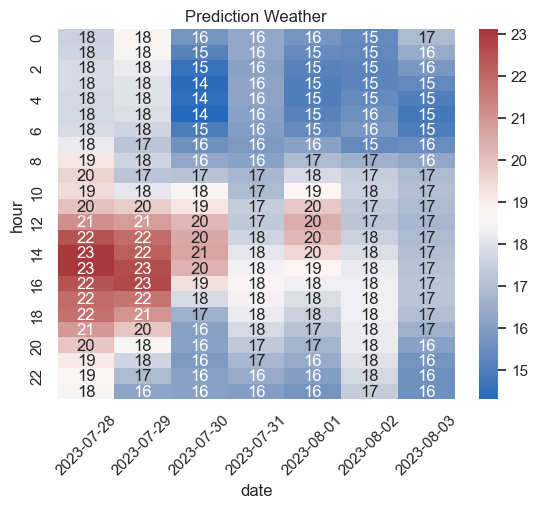

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.heatmap(df, cmap='vlag', annot=True)
plt.xticks(rotation=45)
plt.title('Prediction Weather')
plt.savefig('images/prediction.svg')